In [1]:
from matplotlib import image
import cv2
import numpy as np
import os
import matplotlib.pyplot as plt
from PIL import Image
import pandas as pd
from sklearn.model_selection import train_test_split
from dotenv import load_dotenv
load_dotenv()

True

In [2]:
%load_ext autoreload
%autoreload 2

In [3]:
from itertools import chain
import seaborn as sns

In [4]:
import sys
sys.path.insert(0, os.getenv('root_path'))

In [5]:
import random

In [6]:
import lib.breast_segment

In [7]:
filenames_dict = {}
classes = ['1','2','3','4']
subsets = ['train','valid','test']
folder = 'ddsm_four_classes'

ddsm

In [8]:
ddsm = []
i = 0 
for root, _ , files in os.walk(os.path.join(os.getenv('data_path'),'baza_student_raw','ddsm_four_classes','train')):
    for file in files:
        if file.endswith(".png")&((i%10)==0):
            ddsm.append(image.imread(os.path.join(root,file)).reshape(50176))
        i+=1

In [9]:
ddsm.__len__()

688

In [10]:
ddsm = random.sample(ddsm, 500)

In [11]:
ddsm.__len__()

500

In [12]:
ddsm = list(chain.from_iterable(ddsm))

In [13]:
ddsm.__len__()

25088000

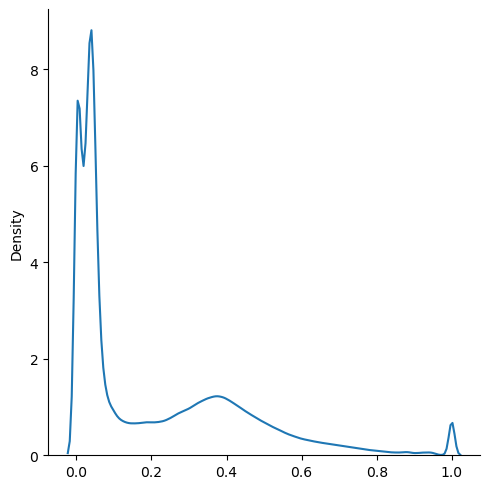

In [55]:
sns.displot(ddsm, kind="kde")
plt.show()

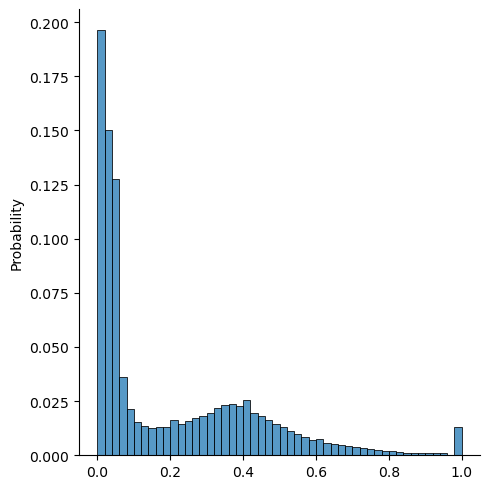

In [49]:
sns.displot(ddsm, stat="probability", bins=50)
plt.show()

ddsm_segmented

In [14]:
ddsm_segmented = []
i = 0
for root, _ , files in os.walk(os.path.join(os.getenv('data_path'),'baza_student_raw','ddsm_four_classes_split','train')):
    for file in files:
        if file.endswith(".png")&((i%10)==0):
            ddsm_segmented.append(image.imread(os.path.join(root,file)).reshape(50176))
        i+=1

In [15]:
ddsm_segmented.__len__()

620

In [16]:
ddsm_segmented = random.sample(ddsm_segmented, 500)

In [17]:
ddsm_segmented = list(chain.from_iterable(ddsm_segmented))

In [18]:
ddsm_segmented.__len__()

25088000

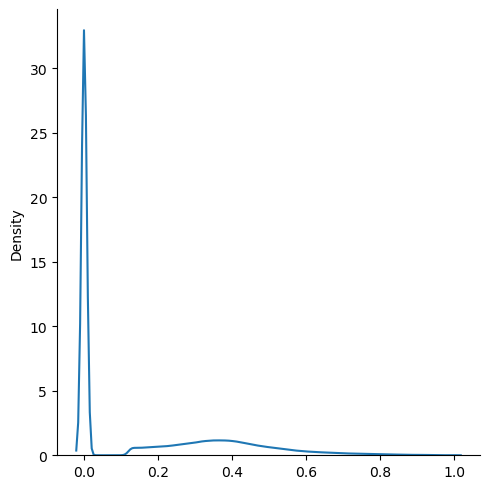

In [59]:
sns.displot(ddsm_segmented, kind="kde")
plt.show()

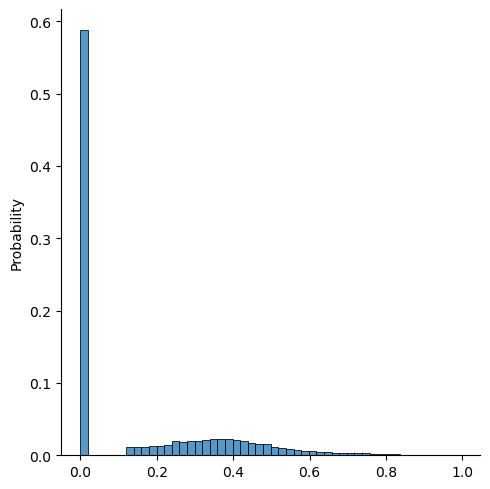

In [50]:
sns.displot(ddsm_segmented, stat="probability", bins=50)
plt.show()

vindr

In [19]:
def rgb2gray(rgb):

    r, g, b = rgb[:,:,0], rgb[:,:,1], rgb[:,:,2]
    gray = 0.2989 * r + 0.5870 * g + 0.1140 * b

    return gray

In [20]:
vindr = []
i = 0
for root, _ , files in os.walk(os.path.join(os.getenv('data_path'),'baza_student_raw','vindr_four_classes_dark_augment', 'train')):
    for file in files:
        if file.endswith(".png")&((i%10)==0)&~(file.startswith('a')):
            vindr.append(rgb2gray(image.imread(os.path.join(root,file))).reshape(50176))
        i+=1

In [21]:
vindr.__len__()

1033

In [22]:
vindr = random.sample(vindr, 500)

In [23]:
vindr = list(chain.from_iterable(vindr))

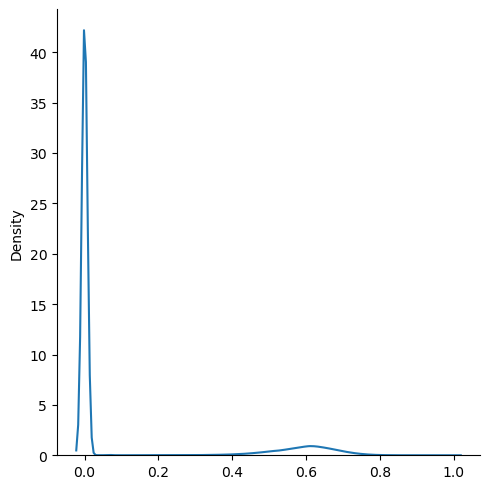

In [65]:
sns.displot(vindr, kind="kde")
plt.show()

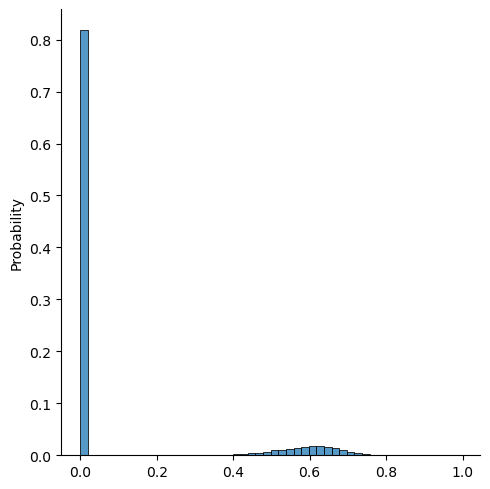

In [51]:
sns.displot(vindr, stat="probability", bins=50)
plt.show()

vindr_seg

In [24]:
from lib import breast_segment

In [25]:
vindr_seg = []
i = 0
for root, _ , files in os.walk(os.path.join(os.getenv('data_path'),'baza_student_raw','vindr_four_classes_dark_augment', 'train')):
    for file in files:
        if file.endswith(".png")&((i%10)==0)&~(file.startswith('a')):
            segmented = breast_segment.segment_breast(rgb2gray(image.imread(os.path.join(root,file))),30)
            vindr_seg.append(segmented.reshape(50176))
        i+=1

In [26]:
vindr_seg = random.sample(vindr_seg, 500)

In [27]:
vindr_seg = list(chain.from_iterable(vindr_seg))

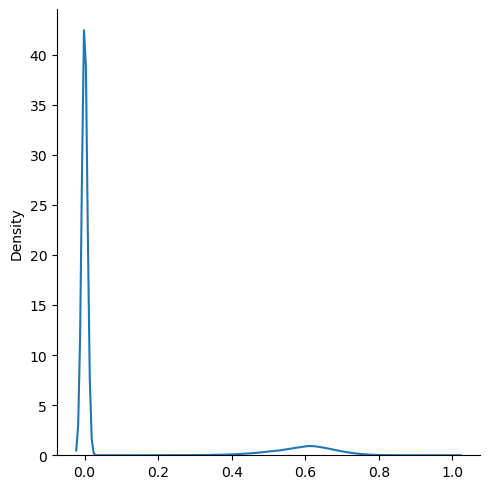

In [71]:
sns.displot(vindr_seg, kind="kde")
plt.show()

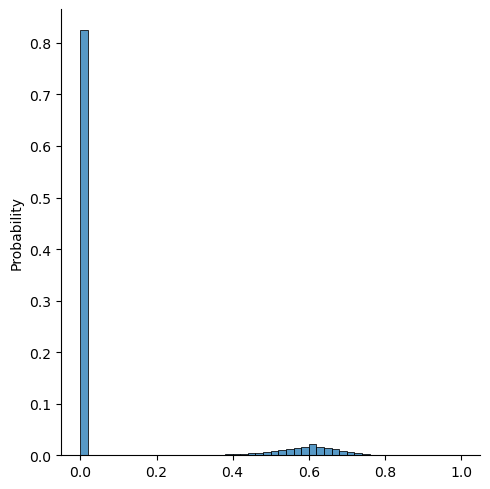

In [52]:
sns.displot(vindr_seg, stat="probability", bins=50)
plt.show()

summary

In [64]:
pixels = [pd.Series(x) for x in [ddsm_segmented,vindr_seg]]

In [65]:
pixels_df = pd.concat(pixels)

In [66]:
pixels_df.shape

(50176000,)

In [67]:
pixels_df = pd.DataFrame(pixels_df)

In [68]:
pixels_df.shape

(50176000, 1)

In [69]:
pixels_df.columns = ['pixels']

In [70]:
pixels_df.head()

,pixels
0,0.0
1,0.0
2,0.0
3,0.0
4,0.0


In [71]:
pixels_df['dataset'] = list(chain.from_iterable([['DDSM segmented']*25088000,['VinDr segmented']*25088000]))

In [72]:
pixels_df.head()

,pixels,dataset
0,0.0,DDSM segmented
1,0.0,DDSM segmented
2,0.0,DDSM segmented
3,0.0,DDSM segmented
4,0.0,DDSM segmented


In [73]:
pixels_df = pixels_df.loc[pixels_df.pixels>0]

In [74]:
pixels_df.shape

(14748071, 2)

In [77]:
pixels_df['pixels'] = pixels_df['pixels'].apply(lambda x: round(x,2))

In [78]:
pixels_df.head()

,pixels,dataset
109,0.13,DDSM segmented
110,0.14,DDSM segmented
111,0.15,DDSM segmented
112,0.15,DDSM segmented
113,0.20,DDSM segmented


In [81]:
pixels_df.reset_index(drop=True,inplace=True)

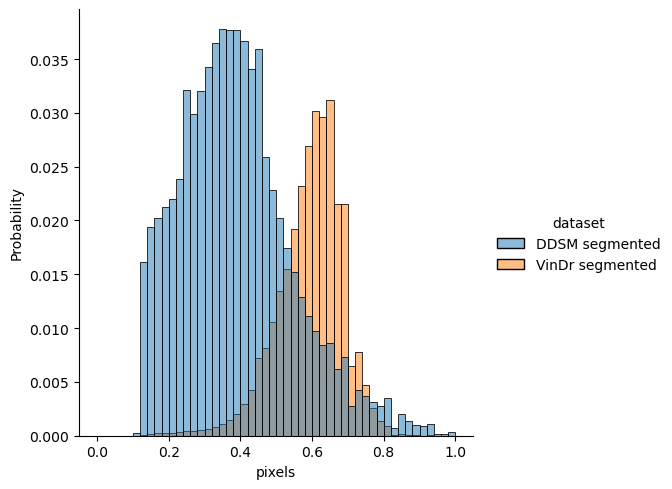

In [84]:
sns.displot(pixels_df, x='pixels', hue='dataset', stat="probability", bins = 50)
plt.show()

In [ ]:
sns.displot(pixels_df.loc[pixels_df.pixels>0.01], x=pixels_df.columns[0], hue=pixels_df.columns[1], stat="probability")

7692_vindr.png


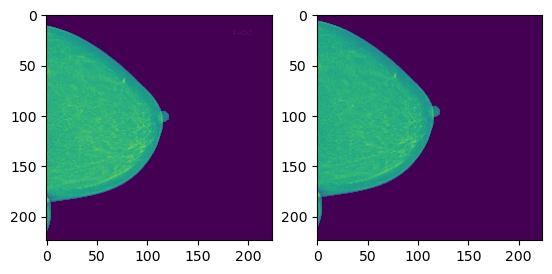

5718_vindr.png


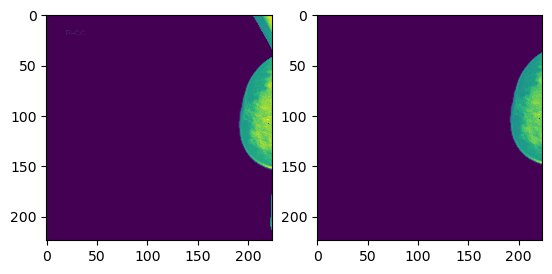

2886_vindr.png


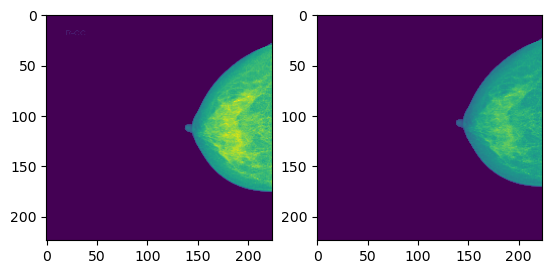

10194_vindr.png


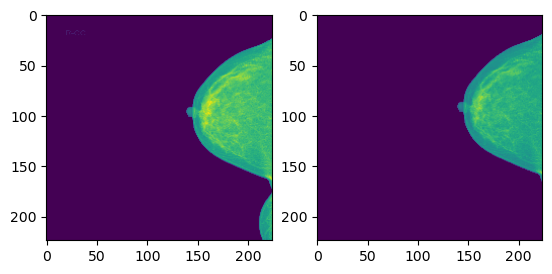

2435_vindr.png


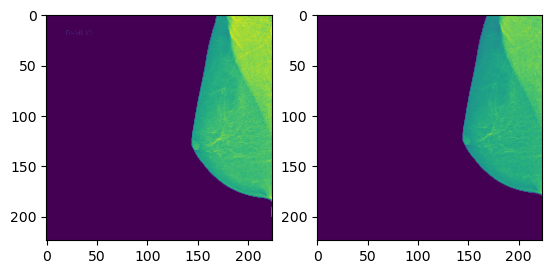

2909_vindr.png


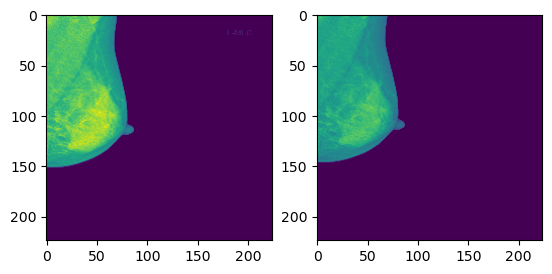

12191_vindr.png


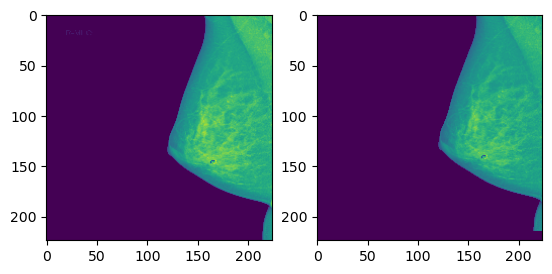

14915_vindr.png


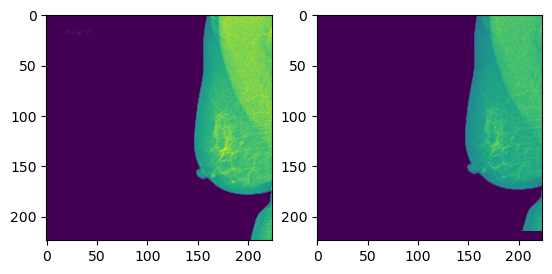

augmented_4045.png


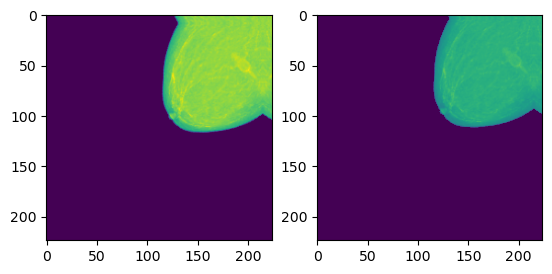

augmented_20975.png


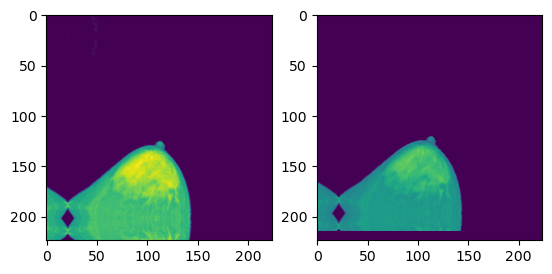

10641_vindr.png


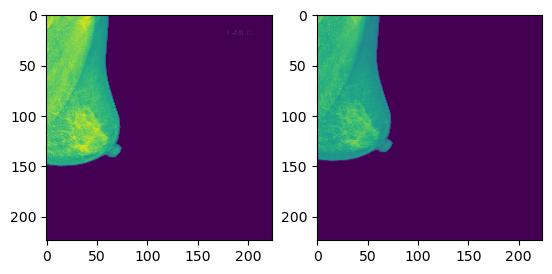

augmented_11570.png


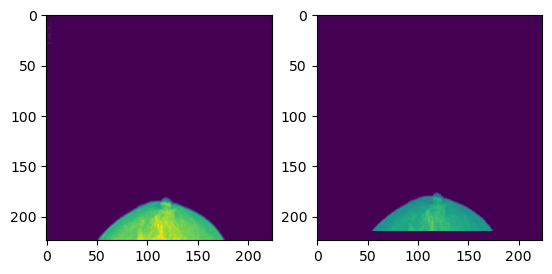

In [86]:
i=0
for root, _ , files in os.walk(os.path.join(os.getenv('data_path'),'baza_student_raw','vindr_four_classes_dark_augment')):
    for file in files:
            if file.endswith(".png"):
                img = rgb2gray(image.imread(os.path.join(root,file)))
                print(file)
                segmented = breast_segment.segment_breast(img,30)
                f, axarr = plt.subplots(1,2)
                axarr[0].imshow(img)
                axarr[1].imshow(segmented, vmax = 1)
                plt.show()
                i+=1
                break

# Test subsets trained on local models

In [1]:
import warnings

import torch
import torch.nn as nn
import torch.optim as optim
from torch.utils.data import DataLoader
from torchvision import transforms
from tqdm import tqdm
from torchvision.datasets import ImageFolder
import wandb
import argparse
import os
from dotenv import load_dotenv
load_dotenv()

True

In [3]:
DEVICE = torch.device("mps")

In [2]:
def load_data(dataset):
    norm = [0.5, 0.5, 0.5]
    train_transform = transforms.Compose([transforms.Resize((224, 224)),
                                          transforms.ToTensor(),
                                          transforms.Normalize(norm, norm)])

    test_transform = transforms.Compose([transforms.Resize((224, 224)),
                                         transforms.ToTensor(),
                                         transforms.Normalize(norm, norm)])

    train_data = ImageFolder(os.path.join(os.getenv('root_path'),dataset,"train"), transform=train_transform)
    valid_data = ImageFolder(os.path.join(os.getenv('root_path'),dataset,"valid"), transform=test_transform)

    return DataLoader(train_data, batch_size=12, shuffle=True), DataLoader(valid_data)


In [10]:
trainloader_vindr, testloader_vindr = load_data('data/baza_student_raw/vindr_two_classes_split')

In [11]:
trainloader_ddsm, testloader_ddsm = load_data('data/baza_student_raw/ddsm_two_classes_split')

In [4]:
def test(net, testloader):
    """Validate the model on the test set."""
    net.eval()
    criterion = torch.nn.CrossEntropyLoss()
    correct, total, loss = 0, 0, 0.0
    with torch.no_grad():
        for images, labels in tqdm(testloader):
            outputs = net(images.to(DEVICE))
            labels = labels.to(DEVICE)
            loss += criterion(outputs, labels).item()
            total += labels.size(0)
            correct += (torch.max(outputs.data, 1)[1] == labels).sum().item()
    return loss / len(testloader.dataset), correct / total

In [5]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
model.classifier = nn.Sequential(nn.Linear(in_features = 1000,out_features = 500),
                                 nn.ReLU(inplace = True),
                                 nn.Linear(in_features = 500,out_features = int(2)))

Using cache found in /Users/krystianzielinski/.cache/torch/hub/pytorch_vision_v0.10.0
/opt/homebrew/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [6]:
model_vindr = model
model_vindr.load_state_dict(torch.load('../models/vindr_two_classes_split_adam_lr_0001.h5'))

<All keys matched successfully>

In [13]:
model_vindr.to(DEVICE)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [14]:
test(model_vindr, testloader_vindr)

100%|██████████| 4007/4007 [01:15<00:00, 53.28it/s]


(0.21040248456174296, 0.919640628899426)

In [15]:
test(model_vindr, testloader_ddsm)

100%|██████████| 2067/2067 [00:37<00:00, 55.71it/s]


(1.1147605940151668, 0.5728108369617804)

In [16]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
model.classifier = nn.Sequential(nn.Linear(in_features = 1000,out_features = 500),
                                 nn.ReLU(inplace = True),
                                 nn.Linear(in_features = 500,out_features = int(2)))
model_ddsm = model
model_ddsm.load_state_dict(torch.load('../models/ddsm_two_classes_split_adam_lr_0001.h5'))
model_ddsm.to(DEVICE)

Using cache found in /Users/krystianzielinski/.cache/torch/hub/pytorch_vision_v0.10.0
/opt/homebrew/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [17]:
test(model_ddsm, testloader_vindr)

100%|██████████| 4007/4007 [01:11<00:00, 55.83it/s]


(1.0974703404630226, 0.3768405290741203)

In [18]:
test(model_ddsm, testloader_ddsm)

100%|██████████| 2067/2067 [00:37<00:00, 55.04it/s]


(0.41492940640638737, 0.8055152394775036)

## Class 2 4

In [19]:
trainloader_vindr, testloader_vindr = load_data('data/baza_student_raw/vindr_2_4')

In [20]:
trainloader_ddsm, testloader_ddsm = load_data('data/baza_student_raw/ddsm_2_4')

In [21]:
def test(net, testloader):
    """Validate the model on the test set."""
    net.eval()
    criterion = torch.nn.CrossEntropyLoss()
    correct, total, loss = 0, 0, 0.0
    with torch.no_grad():
        for images, labels in tqdm(testloader):
            outputs = net(images.to(DEVICE))
            labels = labels.to(DEVICE)
            loss += criterion(outputs, labels).item()
            total += labels.size(0)
            correct += (torch.max(outputs.data, 1)[1] == labels).sum().item()
    return loss / len(testloader.dataset), correct / total

In [22]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
model.classifier = nn.Sequential(nn.Linear(in_features = 1000,out_features = 500),
                                 nn.ReLU(inplace = True),
                                 nn.Linear(in_features = 500,out_features = int(2)))

Using cache found in /Users/krystianzielinski/.cache/torch/hub/pytorch_vision_v0.10.0
/opt/homebrew/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:208: UserWarning: The parameter 'pretrained' is deprecated since 0.13 and may be removed in the future, please use 'weights' instead.
  warnings.warn(
/opt/homebrew/anaconda3/lib/python3.9/site-packages/torchvision/models/_utils.py:223: UserWarning: Arguments other than a weight enum or `None` for 'weights' are deprecated since 0.13 and may be removed in the future. The current behavior is equivalent to passing `weights=ResNet50_Weights.IMAGENET1K_V1`. You can also use `weights=ResNet50_Weights.DEFAULT` to get the most up-to-date weights.
  warnings.warn(msg)


In [23]:
model_vindr = model
model_vindr.load_state_dict(torch.load('../models/vindr_2_4_adam_lr_0004_no_freeze.h5'))

<All keys matched successfully>

In [24]:
model_vindr.to(DEVICE)

ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [25]:
test(model_vindr, testloader_vindr)

100%|██████████| 912/912 [00:20<00:00, 43.61it/s]


(0.08638148477904838, 0.9682017543859649)

In [26]:
test(model_vindr, testloader_ddsm)

100%|██████████| 1184/1184 [00:26<00:00, 43.99it/s]


(3.7033320327568333, 0.5430743243243243)

In [27]:
model = torch.hub.load('pytorch/vision:v0.10.0', 'resnet50', pretrained=True)
model.classifier = nn.Sequential(nn.Linear(in_features = 1000,out_features = 500),
                                 nn.ReLU(inplace = True),
                                 nn.Linear(in_features = 500,out_features = int(2)))
model_ddsm = model
model_ddsm.load_state_dict(torch.load('../models/ddsm_2_4_adam_lr_0002_no_freeze.h5'))
model_ddsm.to(DEVICE)

Using cache found in /Users/krystianzielinski/.cache/torch/hub/pytorch_vision_v0.10.0


ResNet(
  (conv1): Conv2d(3, 64, kernel_size=(7, 7), stride=(2, 2), padding=(3, 3), bias=False)
  (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (relu): ReLU(inplace=True)
  (maxpool): MaxPool2d(kernel_size=3, stride=2, padding=1, dilation=1, ceil_mode=False)
  (layer1): Sequential(
    (0): Bottleneck(
      (conv1): Conv2d(64, 64, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv2): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1), bias=False)
      (bn2): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (conv3): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 1), bias=False)
      (bn3): BatchNorm2d(256, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (relu): ReLU(inplace=True)
      (downsample): Sequential(
        (0): Conv2d(64, 256, kernel_size=(1, 1), stride=(1, 

In [28]:
test(model_ddsm, testloader_vindr)

100%|██████████| 912/912 [00:20<00:00, 44.28it/s]


(2.9516489634393746, 0.5756578947368421)

In [29]:
test(model_ddsm, testloader_ddsm)

100%|██████████| 1184/1184 [00:26<00:00, 43.96it/s]


(0.4199860547759703, 0.924831081081081)